# Project: Credit Card Fraud Detection 

In [1]:
#Header Files 

import numpy as np
import scipy as scp
import pandas as pd

In [2]:
data1=pd.read_csv(r"data\fraudTrain.csv")
data2=pd.read_csv(r"data\fraudTest.csv")

In [3]:
data=pd.concat([data1,data2])

In [4]:
data.shape

(1852394, 23)

In [5]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

We have a separate test csv file. So we will use full dataset. 

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(1852394, 23)

## Data Cleaning

This is an higly imbalanced dataset with 0.005 ratio between fraud and non-fraud transactions. This dataset carries detail about almost all parameters like, time-stamp of transaction, location, demographic info

In [9]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
len(data.columns)

23

In [11]:
data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [12]:
data.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [13]:
data['age']=abs(pd.to_datetime(data['trans_date_trans_time']).dt.year-pd.to_datetime(data['dob']).dt.year)   

In [16]:
pd.to_datetime(data['trans_date_trans_time']).dt.year-pd.to_datetime(data['dob']).dt.year   

0         31
1         41
2         57
3         52
4         33
          ..
555714    54
555715    21
555716    39
555717    55
555718    27
Length: 1852394, dtype: int64

In [18]:
pd.to_datetime(data['trans_date_trans_time']).dt.hour

0          0
1          0
2          0
3          0
4          0
          ..
555714    23
555715    23
555716    23
555717    23
555718    23
Name: trans_date_trans_time, Length: 1852394, dtype: int64

In [14]:
data['trans_month']=pd.to_datetime(data['trans_date_trans_time']).dt.month
data.drop(columns='trans_month',inplace=True)

In [15]:
a=pd.to_datetime(data['trans_date_trans_time']).dt.time

In [16]:
a=a.astype('str')

In [17]:
temp_df=pd.DataFrame()

In [18]:
# Calculate total seconds
temp_df[['hour', 'minute', 'second']]=a.str.split(':', expand=True).astype(int)
temp_df['time_in_seconds'] = temp_df['hour'] * 3600 + temp_df['minute'] * 60 + temp_df['second']


In [19]:
temp_df['time_in_hour']=temp_df['hour']

In [20]:
data['trans_time_sec']= temp_df['time_in_seconds']

In [21]:
data['trans_time_hour']=temp_df['time_in_hour']

In [22]:
data

Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2019-01-01 00:00:18  2703186189652095   
1                1   2019-01-01 00:00:44      630423337322   
2                2   2019-01-01 00:00:51    38859492057661   
3                3   2019-01-01 00:01:16  3534093764340240   
4                4   2019-01-01 00:03:06   375534208663984   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt      first  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97   Jennifer   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23  Stephanie   
2                     fraud_Lind-Buckridge   entertainment  220.11     Edward   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00     Jeremy   
4                      fraud_Keeling-Crist        misc_pos   41.96      Tyler   
...                                    ...             ...     ...        ...   
555714               fraud_Reilly and Sons  health_fitness   43.77    Michael   
555715                fraud_Hoppe-Parisian       kids_pets  111.84       Jose   
555716                     fraud_Rau-Robel       kids_pets   86.88        Ann   
555717               fraud_Breitenberg LLC          travel    7.99       Eric   
555718                   fraud_Dare-Marvin   entertainment   38.13     Samuel   

           last gender                        street  ...  \
0         Banks      F                561 Perry Cove  ...   
1          Gill      F  43039 Riley Greens Suite 393  ...   
2       Sanchez      M      594 White Dale Suite 530  ...   
3         White      M   9443 Cynthia Court Apt. 038  ...   
4        Garcia      M              408 Bradley Rest  ...   
...         ...    ...                           ...  ...   
555714    Olson      M           558 Michael Estates  ...   
555715  Vasquez      M           572 Davis Mountains  ...   
555716   Lawson      F    144 Evans Islands Apt. 683  ...   
555717  Preston      M    7020 Doyle Stream Apt. 951  ...   
555718     Frey      M      830 Myers Plaza Apt. 384  ...   

                                      job         dob  \
0               Psychologist, counselling  1988-03-09   
1       Special educational needs teacher  1978-06-21   
2             Nature conservation officer  1962-01-19   
3                         Patent attorney  1967-01-12   
4          Dance movement psychotherapist  1986-03-28   
...                                   ...         ...   
555714                       Town planner  1966-02-13   
555715                     Futures trader  1999-12-27   
555716                           Musician  1981-11-29   
555717                       Cartographer  1965-12-15   
555718                        Media buyer  1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1       1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2       a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3       6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4       a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                  ...         ...        ...         ...   
555714  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
555715  2090647dac2c89a1d86c514c427f5b91  1388534349  29.661049  -96.186633   
555716  6c5b7c8add471975aa0fec023b2e8408  1388534355  46.658340 -119.715054   
555717  14392d723bb7737606b2700ac791b7aa  1388534364  44.470525 -117.080888   
555

##### Rationalae Behind Dropping columns

Since transaction status won't get affected by CC_Number.  
Name has nothing to do with transaction.   
Street, City and State details are captured in zipcode and Lat-Long  


In [23]:
# Now we will check column wise stats for categorical data

In [24]:
data.is_fraud.value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

In [25]:
data.is_fraud.value_counts()[1]/data.is_fraud.value_counts()[0]

0.005237301132062366

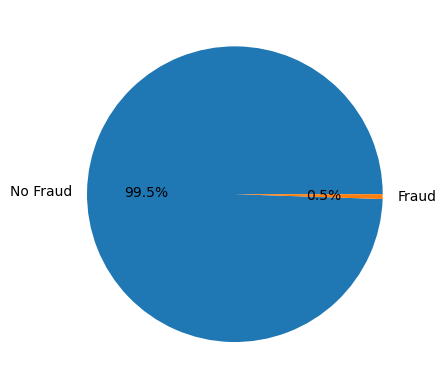

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.pie(data.is_fraud.value_counts(), labels=['No Fraud', 'Fraud'], autopct='%1.1f%%')
plt.show()

In [27]:
data.category.value_counts()

gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: category, dtype: int64

In [28]:
len(data.merchant.unique())  # or data['merchant'].nunique()

693

In [29]:
data.gender.value_counts()

F    1014749
M     837645
Name: gender, dtype: int64

In [30]:
data.groupby(['gender','category']).count()

Unnamed: 0  trans_date_trans_time  cc_num  merchant  \
gender category                                                              
F      entertainment        68756                  68756   68756     68756   
       food_dining          69235                  69235   69235     69235   
       gas_transport       103960                 103960  103960    103960   
       grocery_net          36206                  36206   36206     36206   
       grocery_pos          93239                  93239   93239     93239   
       health_fitness       64672                  64672   64672     64672   
       home                 92875                  92875   92875     92875   
       kids_pets            89960                  89960   89960     89960   
       misc_net             51072                  51072   51072     51072   
       misc_pos             60743                  60743   60743     60743   
       personal_care        79307                  79307   79307     79307   
       shopping_net         79125                  79125   79125     79125   
       shopping_pos         96753                  96753   96753     96753   
       travel               28846                  28846   28846     28846   
M      entertainment        65362                  65362   65362     65362   
       food_dining          61494                  61494   61494     61494   
       gas_transport        84069                  84069   84069     84069   
       grocery_net          28672                  28672   28672     28672   
       grocery_pos          82952                  82952   82952     82952   
       health_fitness       57881                  57881   57881     57881   
       home                 82585                  82585   82585     82585   
       kids_pets            71767                  71767   71767     71767   
       misc_net             39582                  39582   39582     39582   
       misc_pos             53486                  53486   53486     53486   
       personal_care        50778                  50778   50778     50778   
       shopping_net         60197                  60197   60197     60197   
       shopping_pos         69710                  69710   69710     69710   
       travel               29110                  29110   29110     29110   

                          amt   first    last  street    city   state  ...  \
gender category                                                        ...   
F      entertainment    68756   68756   68756   68756   68756   68756  ...   
       food_dining      69235   69235   69235   69235   69235   69235  ...   
       gas_transport   103960  103960  103960  103960  103960  103960  ...   
       grocery_net      36206   36206   36206   36206   36206   36206  ...   
       grocery_pos      93239   93239   93239   93239   93239   93239  ...   
       health_fitness   64672   64672   64672   64672   64672   64672  ...   
       home             92875   92875   92875   92875   92875   92875  ...   
       kids_pets        89960   89960   89960   89960   89960   89960  ...   
       misc_net         51072   51072   51072   51072   51072   51072  ...   
       misc_pos         60743   60743   60743   60743   60743   60743  ...   
       personal_care    79307   79307   79307   79307   79307   79307  ...   
       shopping_net     79125   79125   79125   79125   79125   79125  ...   
       shopping_pos     96753   96753   96753   96753   96753   96753  ...   
       travel           28846   28846   28846   28846   28846   28846  ...   
M      entertainment    65362   65362   65362   65362   65362   65362  ...   
       food_dining      61494   61494   61494   61494   61494   61494  ...   
       gas_transport    84069   84069   84069   84069   84069   84069  ...   
       grocery_net      28672   28672   28672   28672   28672   28672  ...   
       grocery_pos      82952   82952   82952   82952   82952   82952  ...   
       health_fitness   57881   57881   5788

In [31]:
spend_trend=data.groupby(['gender', 'category']).size().reset_index(name='count')

In [32]:
spend_trend.pivot(index='gender', columns='category', values='count')

category  entertainment  food_dining  gas_transport  grocery_net  grocery_pos  \
gender                                                                          
F                 68756        69235         103960        36206        93239   
M                 65362        61494          84069        28672        82952   

category  health_fitness   home  kids_pets  misc_net  misc_pos  personal_care  \
gender                                                                          
F                  64672  92875      89960     51072     60743          79307   
M                  57881  82585      71767     39582     53486          50778   

category  shopping_net  shopping_pos  travel  
gender                                        
F                79125         96753   28846  
M                60197         69710   29110

In [33]:
data.groupby(['category','is_fraud']).size().reset_index(name='count')

category  is_fraud   count
0    entertainment         0  133826
1    entertainment         1     292
2      food_dining         0  130524
3      food_dining         1     205
4    gas_transport         0  187257
5    gas_transport         1     772
6      grocery_net         0   64703
7      grocery_net         1     175
8      grocery_pos         0  173963
9      grocery_pos         1    2228
10  health_fitness         0  122368
11  health_fitness         1     185
12            home         0  175195
13            home         1     265
14       kids_pets         0  161423
15       kids_pets         1     304
16        misc_net         0   89472
17        misc_net         1    1182
18        misc_pos         0  113907
19        misc_pos         1     322
20   personal_care         0  129795
21   personal_care         1     290
22    shopping_net         0  137103
23    shopping_net         1    2219
24    shopping_pos         0  165407
25    shopping_pos         1    1056
26          travel         0   57800
27          travel         1     156

In [34]:
pd.to_datetime(data['dob']).dt.year             #pd.to_datetime(data['dob']).dt.year
                                            # data['dob'].str.replace(r'^(\d{4})-\d{2}-\d{2}$', r'\1', regex=True)

0         1988
1         1978
2         1962
3         1967
4         1986
          ... 
555714    1966
555715    1999
555716    1981
555717    1965
555718    1993
Name: dob, Length: 1852394, dtype: int64

In [35]:
data.age.value_counts().reset_index(name='count').rename(columns={'index': 'age'})

age  count
0    49  65036
1    37  56964
2    34  53377
3    36  53335
4    47  48984
..  ...    ...
77   89   2965
78   16   2922
79   97    735
80   19     12
81   96     11

[82 rows x 2 columns]

What does name in reset_index signifies

In [36]:
data.age.value_counts().reset_index(name='count').rename(columns={'index': 'age'})

age  count
0    49  65036
1    37  56964
2    34  53377
3    36  53335
4    47  48984
..  ...    ...
77   89   2965
78   16   2922
79   97    735
80   19     12
81   96     11

[82 rows x 2 columns]

### Things to be done tomorrow 

1. Plot different features with fraud=0 or 1. Bar Plots and Pie chart 
2. Correlation
3. Assumptions on data


In [37]:
grouped_cat=data.groupby(['category','is_fraud']).size().reset_index(name='count')

In [38]:
pivot_df_cat=grouped_cat.pivot(index='category', columns='is_fraud', values='count').sort_values(by=[1])


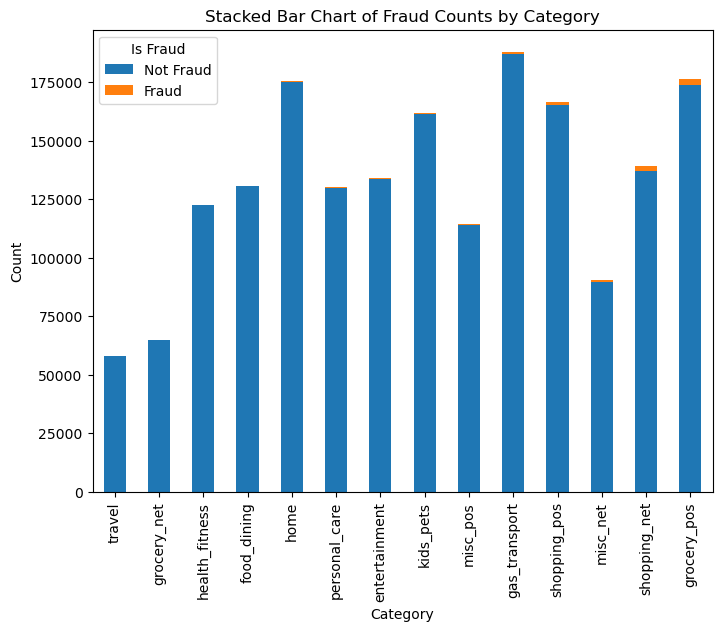

In [39]:
from matplotlib import pyplot as plt


ax = pivot_df_cat.plot(kind='bar', stacked=True, figsize=(8, 6))

# Adding labels and legend
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Fraud Counts by Category')
plt.legend(title='Is Fraud', labels=['Not Fraud', 'Fraud'])

# Show the plot
plt.show()

In [40]:
grouped_gen_cat=grouped=data.groupby(['gender','category','is_fraud']).size().reset_index(name='count')

In [26]:
data.groupby(['gender','category','is_fraud']).size().reset_index(name='count')

gender        category  is_fraud   count
0       F   entertainment         0   68570
1       F   entertainment         1     186
2       F     food_dining         0   69073
3       F     food_dining         1     162
4       F   gas_transport         0  103640
5       F   gas_transport         1     320
6       F     grocery_net         0   36130
7       F     grocery_net         1      76
8       F     grocery_pos         0   92247
9       F     grocery_pos         1     992
10      F  health_fitness         0   64515
11      F  health_fitness         1     157
12      F            home         0   92636
13      F            home         1     239
14      F       kids_pets         0   89715
15      F       kids_pets         1     245
16      F        misc_net         0   50565
17      F        misc_net         1     507
18      F        misc_pos         0   60524
19      F        misc_pos         1     219
20      F   personal_care         0   79091
21      F   personal_care         1     216
22      F    shopping_net         0   78205
23      F    shopping_net         1     920
24      F    shopping_pos         0   96190
25      F    shopping_pos         1     563
26      F          travel         0   28749
27      F          travel         1      97
28      M   entertainment         0   65256
29      M   entertainment         1     106
30      M     food_dining         0   61451
31      M     food_dining         1      43
32      M   gas_transport         0   83617
33      M   gas_transport         1     452
34      M     grocery_net         0   28573
35      M     grocery_net         1      99
36      M     grocery_pos         0   81716
37      M     grocery_pos         1    1236
38      M  health_fitness         0   57853
39      M  health_fitness         1      28
40      M            home         0   82559
41      M            home         1      26
42      M       kids_pets         0   71708
43      M       kids_pets         1      59
44      M        misc_net         0   38907
45      M        misc_net         1     675
46      M        misc_pos         0   53383
47      M        misc_pos         1     103
48      M   personal_care         0   50704
49      M   personal_care         1      74
50      M    shopping_net         0   58898
51      M    shopping_net         1    1299
52      M    shopping_pos         0   69217
53      M    shopping_pos         1     493
54      M          travel         0   29051
55      M          travel         1      59

In [41]:
grouped_gen_cat=grouped=data.groupby(['gender','category','is_fraud']).size().reset_index(name='count')
pivot_df_gen_cat=grouped_gen_cat.pivot(index=['gender','category'], columns='is_fraud', values='count').fillna(0)


In [42]:
pivot_df_gen_cat.loc['F'].index

Index(['entertainment', 'food_dining', 'gas_transport', 'grocery_net',
       'grocery_pos', 'health_fitness', 'home', 'kids_pets', 'misc_net',
       'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos', 'travel'],
      dtype='object', name='category')

In [43]:
pivot_df_gen_cat.loc['F']

is_fraud             0    1
category                   
entertainment    68570  186
food_dining      69073  162
gas_transport   103640  320
grocery_net      36130   76
grocery_pos      92247  992
health_fitness   64515  157
home             92636  239
kids_pets        89715  245
misc_net         50565  507
misc_pos         60524  219
personal_care    79091  216
shopping_net     78205  920
shopping_pos     96190  563
travel           28749   97

In [44]:
pivot_df_gen_cat.loc['F'][1]

category
entertainment     186
food_dining       162
gas_transport     320
grocery_net        76
grocery_pos       992
health_fitness    157
home              239
kids_pets         245
misc_net          507
misc_pos          219
personal_care     216
shopping_net      920
shopping_pos      563
travel             97
Name: 1, dtype: int64

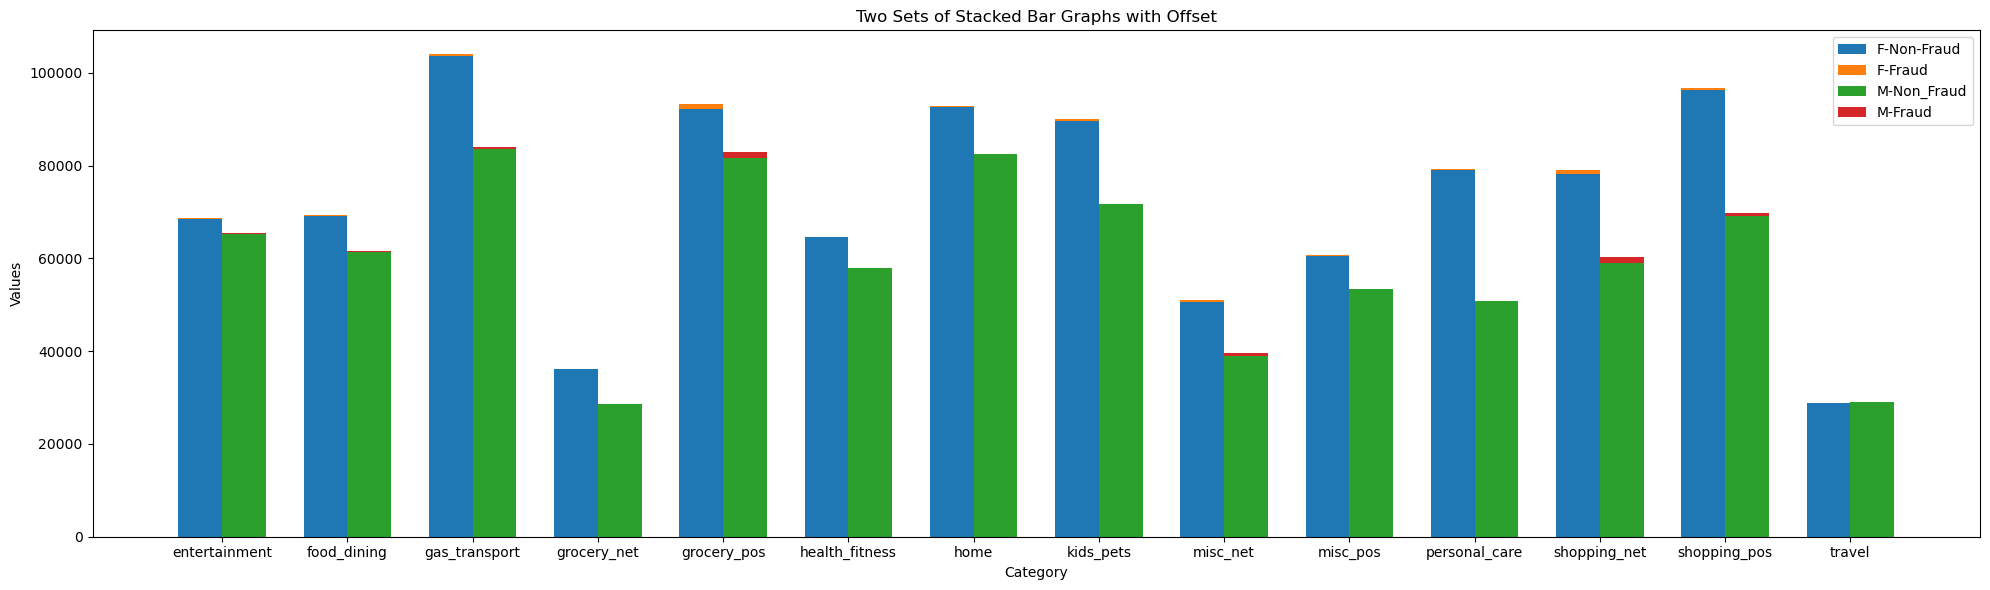

In [45]:
# Note this Standard Procedure to draw Double Stacked Bar Graph between data from 
# two different data frames or data pivoted
fig, ax = plt.subplots(figsize=(20, 6))
bar_width = 0.35
x = np.arange(len(pivot_df_gen_cat.loc['M'].index))

ax.bar(x, pivot_df_gen_cat.loc['F'][0], width=bar_width, label='F-Non-Fraud')
ax.bar(x, pivot_df_gen_cat.loc['F'][1], width=bar_width, label='F-Fraud', bottom=pivot_df_gen_cat.loc['F'][0])


x_offset = x + bar_width

ax.bar(x_offset, pivot_df_gen_cat.loc['M'][0], width=bar_width, label='M-Non_Fraud')
ax.bar(x_offset, pivot_df_gen_cat.loc['M'][1], width=bar_width, label='M-Fraud', bottom=pivot_df_gen_cat.loc['M'][0])

# Customize the plot
ax.set_xlabel('Category')
ax.set_ylabel('Values')
ax.set_title('Two Sets of Stacked Bar Graphs with Offset')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(pivot_df_gen_cat.loc['M'].index)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [46]:
data[data['is_fraud']==1].job.value_counts()       # Check for proportionate of respective jobs and fraud happened 

Quantity surveyor                        69
Naval architect                          66
Materials engineer                       62
Audiological scientist                   58
Senior tax professional/tax inspector    57
                                         ..
Pension scheme manager                    4
Designer, exhibition/display              4
Statistician                              3
Health physicist                          3
Contractor                                2
Name: job, Length: 494, dtype: int64

In [47]:
data[data['is_fraud']==1].job.value_counts() 

Quantity surveyor                        69
Naval architect                          66
Materials engineer                       62
Audiological scientist                   58
Senior tax professional/tax inspector    57
                                         ..
Pension scheme manager                    4
Designer, exhibition/display              4
Statistician                              3
Health physicist                          3
Contractor                                2
Name: job, Length: 494, dtype: int64

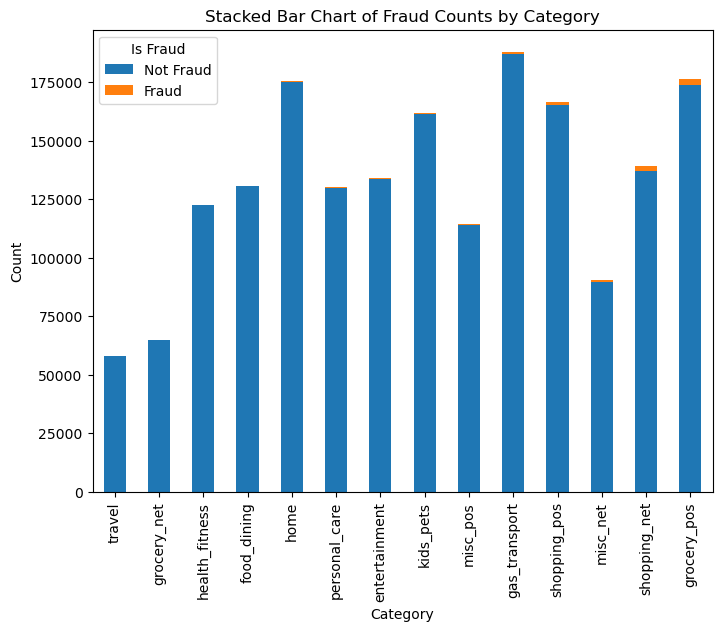

In [48]:
from matplotlib import pyplot as plt


ax = pivot_df_cat.plot(kind='bar', stacked=True, figsize=(8, 6))

# Adding labels and legend
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Fraud Counts by Category')
plt.legend(title='Is Fraud', labels=['Not Fraud', 'Fraud'])

# Show the plot
plt.show()

In [49]:
grouped_job=data.groupby(['job','is_fraud']).size().reset_index(name='count')
pivot_df_job=grouped_job.pivot(index='job', columns='is_fraud', values='count').sort_values(by=[1], ascending=False)

pivot_df_job.iloc

In [50]:
pivot_df_job.iloc[:10]

is_fraud                                     0     1
job                                                 
Quantity surveyor                       8011.0  69.0
Naval architect                        12368.0  66.0
Materials engineer                     11649.0  62.0
Audiological scientist                  8743.0  58.0
Senior tax professional/tax inspector   5820.0  57.0
Trading standards officer               6555.0  56.0
Podiatrist                              9471.0  54.0
Film/video editor                      13846.0  52.0
Exhibition designer                    13116.0  51.0
Colour technologist                     5095.0  51.0

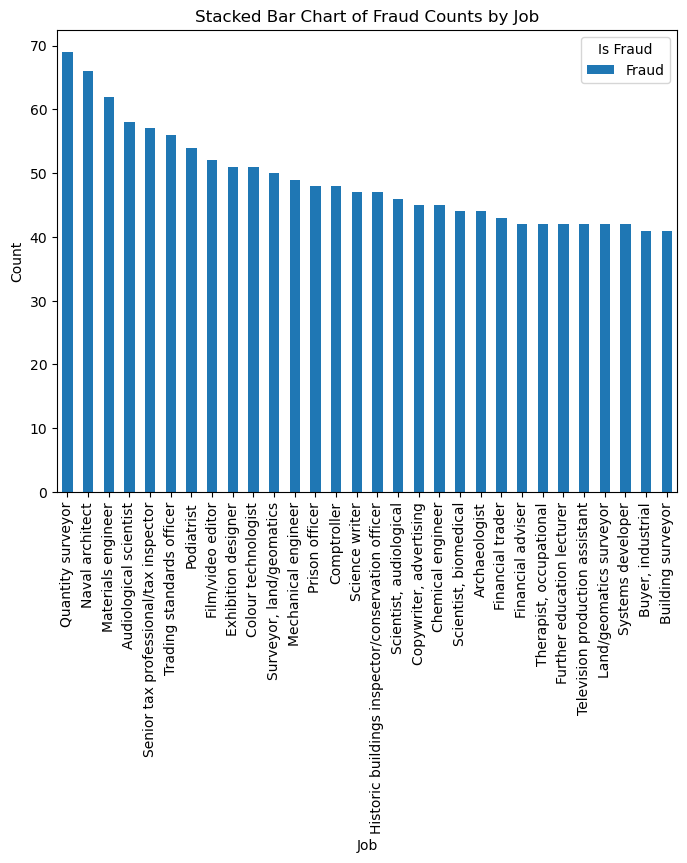

In [51]:
from matplotlib import pyplot as plt


ax = pivot_df_job[:30][1].plot(kind='bar' ,figsize=(8, 6))

# Adding labels and legend
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Fraud Counts by Job')
plt.legend(title='Is Fraud', labels=[ 'Fraud'])

# Show the plot
plt.show()

In [52]:
data

Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2019-01-01 00:00:18  2703186189652095   
1                1   2019-01-01 00:00:44      630423337322   
2                2   2019-01-01 00:00:51    38859492057661   
3                3   2019-01-01 00:01:16  3534093764340240   
4                4   2019-01-01 00:03:06   375534208663984   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt      first  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97   Jennifer   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23  Stephanie   
2                     fraud_Lind-Buckridge   entertainment  220.11     Edward   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00     Jeremy   
4                      fraud_Keeling-Crist        misc_pos   41.96      Tyler   
...                                    ...             ...     ...        ...   
555714               fraud_Reilly and Sons  health_fitness   43.77    Michael   
555715                fraud_Hoppe-Parisian       kids_pets  111.84       Jose   
555716                     fraud_Rau-Robel       kids_pets   86.88        Ann   
555717               fraud_Breitenberg LLC          travel    7.99       Eric   
555718                   fraud_Dare-Marvin   entertainment   38.13     Samuel   

           last gender                        street  ...  \
0         Banks      F                561 Perry Cove  ...   
1          Gill      F  43039 Riley Greens Suite 393  ...   
2       Sanchez      M      594 White Dale Suite 530  ...   
3         White      M   9443 Cynthia Court Apt. 038  ...   
4        Garcia      M              408 Bradley Rest  ...   
...         ...    ...                           ...  ...   
555714    Olson      M           558 Michael Estates  ...   
555715  Vasquez      M           572 Davis Mountains  ...   
555716   Lawson      F    144 Evans Islands Apt. 683  ...   
555717  Preston      M    7020 Doyle Stream Apt. 951  ...   
555718     Frey      M      830 Myers Plaza Apt. 384  ...   

                                      job         dob  \
0               Psychologist, counselling  1988-03-09   
1       Special educational needs teacher  1978-06-21   
2             Nature conservation officer  1962-01-19   
3                         Patent attorney  1967-01-12   
4          Dance movement psychotherapist  1986-03-28   
...                                   ...         ...   
555714                       Town planner  1966-02-13   
555715                     Futures trader  1999-12-27   
555716                           Musician  1981-11-29   
555717                       Cartographer  1965-12-15   
555718                        Media buyer  1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1       1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2       a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3       6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4       a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                  ...         ...        ...         ...   
555714  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
555715  2090647dac2c89a1d86c514c427f5b91  1388534349  29.661049  -96.186633   
555716  6c5b7c8add471975aa0fec023b2e8408  1388534355  46.658340 -119.715054   
555717  14392d723bb7737606b2700ac791b7aa  1388534364  44.470525 -117.080888   
555

In [53]:
grouped_state=data.groupby(['state','is_fraud']).size().reset_index(name='count')
pivot_df_state=grouped_state.pivot(index='state', columns='is_fraud', values='count').sort_values(by=[1], ascending=False)

pivot_df_state.iloc[:30][1]

state
NY    730.0
TX    592.0
PA    572.0
CA    402.0
OH    360.0
FL    334.0
IL    324.0
MI    299.0
MN    280.0
AL    278.0
VA    273.0
MO    262.0
SC    236.0
WI    228.0
KY    222.0
IN    217.0
NE    216.0
IA    211.0
GA    204.0
MD    203.0
OK    200.0
OR    197.0
NC    195.0
AR    195.0
KS    193.0
MS    169.0
NJ    161.0
TN    159.0
WV    146.0
ME    134.0
Name: 1, dtype: float64

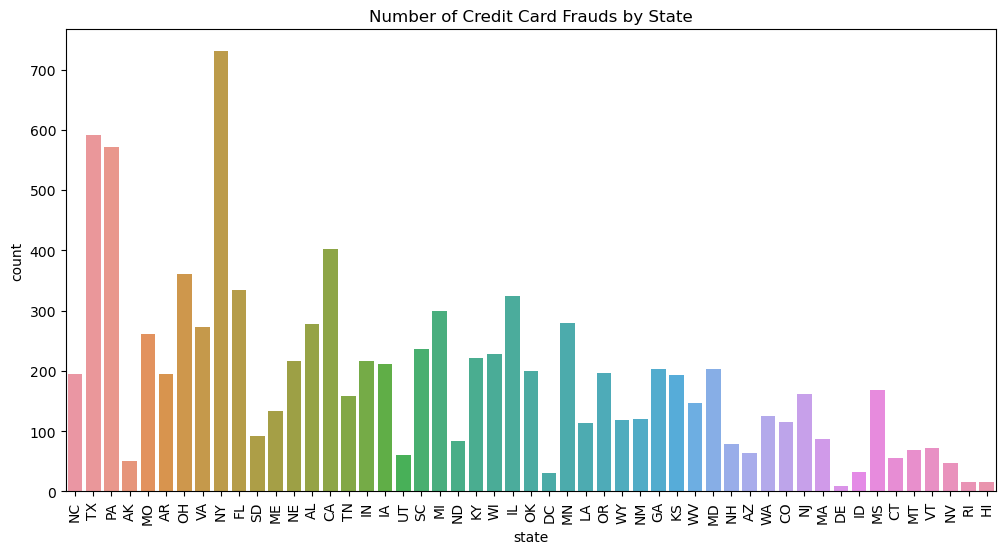

In [54]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x=data[data['is_fraud'] == 1].state  , ax=ax)


plt.title("Number of Credit Card Frauds by State")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

In [55]:
data[data['is_fraud']==1].state

2449      NC
2472      TX
2523      TX
2546      NC
2553      TX
          ..
517197    MS
517274    MS
517341    MS
517529    MS
517571    MS
Name: state, Length: 9651, dtype: object

In [56]:
# totalcat=total.select_dtypes(include=['object'])

In [57]:
import plotly.express as px


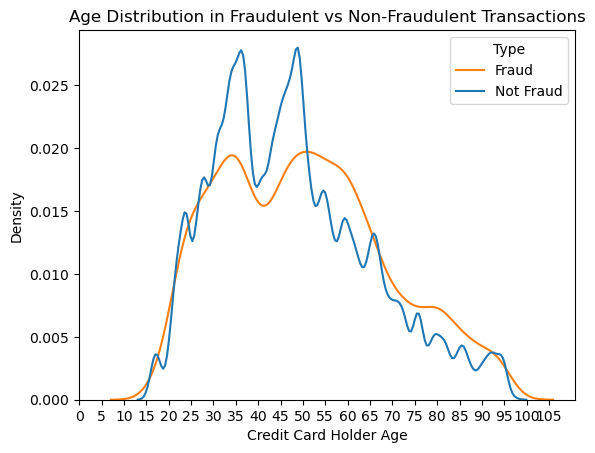

In [58]:

ax=sns.kdeplot(x='age',data=data, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

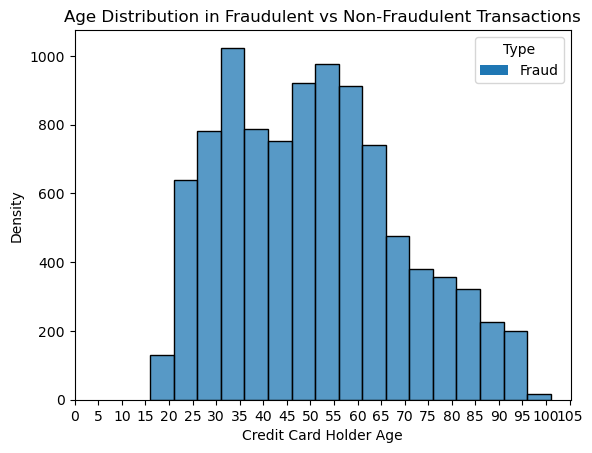

In [59]:
ax=sns.histplot(x='age',data=data[data['is_fraud']==1],bins='10', binwidth=5)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud'])

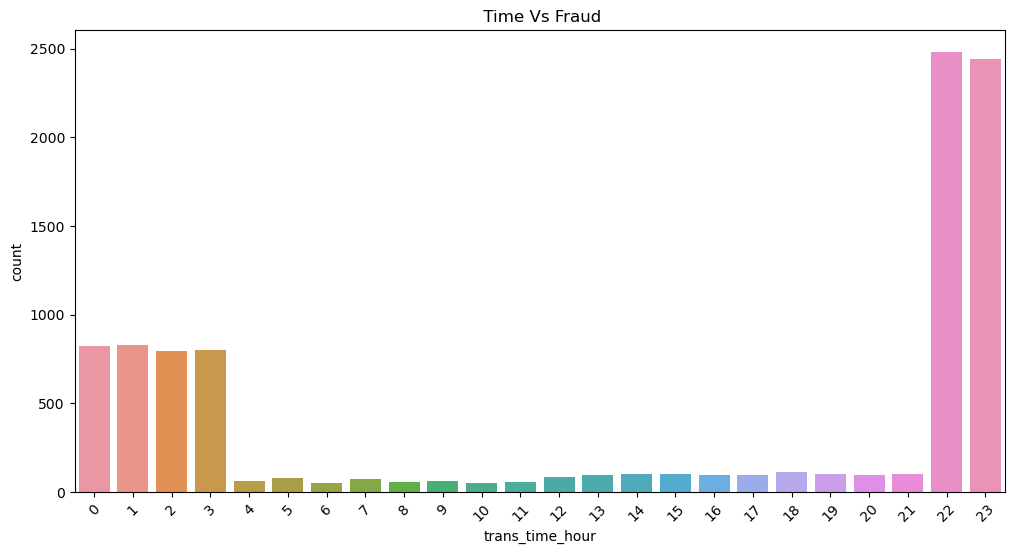

In [60]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x=data[data['is_fraud'] == 1].trans_time_hour  , ax=ax)
plt.title(" Time Vs Fraud")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

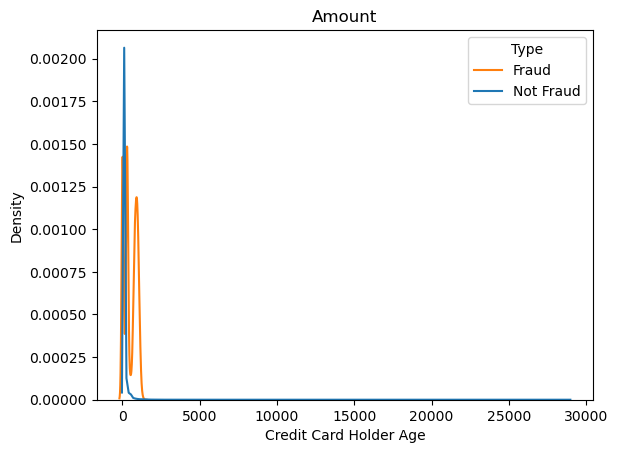

In [61]:
ax=sns.kdeplot(x='amt',data=data, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')

plt.title('Amount')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

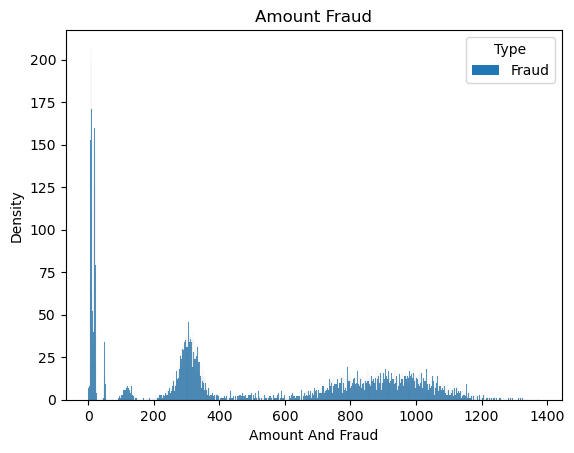

In [62]:
ax=sns.histplot(x='amt',data=data[data['is_fraud']==1],bins=100000, binwidth=1)
ax.set_xlabel('Amount And Fraud')
ax.set_ylabel('Density')

plt.title('Amount Fraud')
plt.legend(title='Type', labels=['Fraud'])
plt.show()

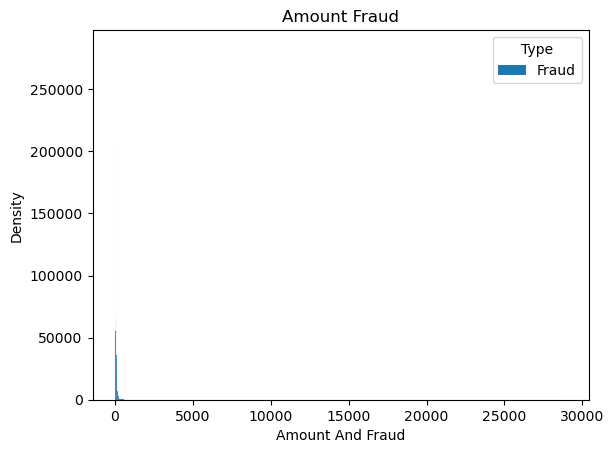

In [63]:
ax=sns.histplot(x='amt',data=data[data['is_fraud']==0],bins=150, binwidth=5)
ax.set_xlabel('Amount And Fraud')
ax.set_ylabel('Density')

plt.title('Amount Fraud')
plt.legend(title='Type', labels=['Fraud'])
plt.show()

In [64]:
data[data['is_fraud']==0]['amt']

0           4.97
1         107.23
2         220.11
3          45.00
4          41.96
           ...  
555714     43.77
555715    111.84
555716     86.88
555717      7.99
555718     38.13
Name: amt, Length: 1842743, dtype: float64

In [65]:
count_bin=pd.DataFrame()

In [66]:
bins=[0,50, 100, 500, 1000, 5000, 10000, 15000, 20000, 25000]

count_bin['not_fraud']=pd.DataFrame(pd.cut(data[data['is_fraud'] == 0].amt, bins=bins)).value_counts()

In [67]:
count_bin['fraud']=pd.DataFrame(pd.cut(data[data['is_fraud'] == 1].amt, bins=bins)).value_counts()

In [68]:
count_bin=count_bin.reset_index()

In [69]:
count_bin

amt  not_fraud  fraud
0         (0, 50]     959160   2069
1       (50, 100]     556224     63
2      (100, 500]     310334   2835
3     (500, 1000]      12731   3459
4    (1000, 5000]       4099   1225
5   (5000, 10000]        149      0
6  (10000, 15000]         32      0
7  (15000, 20000]          7      0
8  (20000, 25000]          2      0

<Axes: xlabel='amt'>

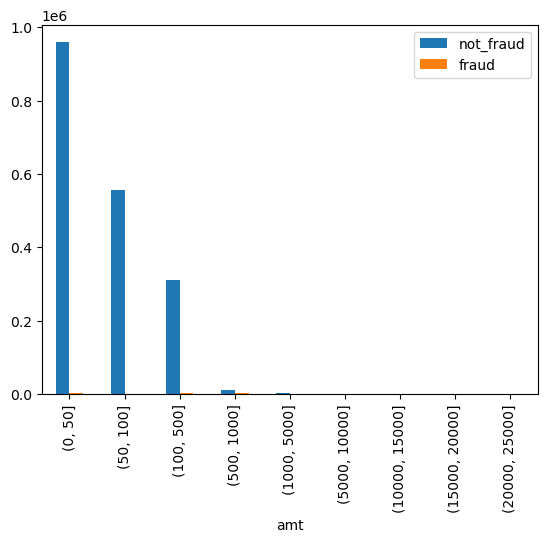

In [70]:
count_bin.plot.bar(x='amt')

In [71]:
data

Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2019-01-01 00:00:18  2703186189652095   
1                1   2019-01-01 00:00:44      630423337322   
2                2   2019-01-01 00:00:51    38859492057661   
3                3   2019-01-01 00:01:16  3534093764340240   
4                4   2019-01-01 00:03:06   375534208663984   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt      first  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97   Jennifer   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23  Stephanie   
2                     fraud_Lind-Buckridge   entertainment  220.11     Edward   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00     Jeremy   
4                      fraud_Keeling-Crist        misc_pos   41.96      Tyler   
...                                    ...             ...     ...        ...   
555714               fraud_Reilly and Sons  health_fitness   43.77    Michael   
555715                fraud_Hoppe-Parisian       kids_pets  111.84       Jose   
555716                     fraud_Rau-Robel       kids_pets   86.88        Ann   
555717               fraud_Breitenberg LLC          travel    7.99       Eric   
555718                   fraud_Dare-Marvin   entertainment   38.13     Samuel   

           last gender                        street  ...  \
0         Banks      F                561 Perry Cove  ...   
1          Gill      F  43039 Riley Greens Suite 393  ...   
2       Sanchez      M      594 White Dale Suite 530  ...   
3         White      M   9443 Cynthia Court Apt. 038  ...   
4        Garcia      M              408 Bradley Rest  ...   
...         ...    ...                           ...  ...   
555714    Olson      M           558 Michael Estates  ...   
555715  Vasquez      M           572 Davis Mountains  ...   
555716   Lawson      F    144 Evans Islands Apt. 683  ...   
555717  Preston      M    7020 Doyle Stream Apt. 951  ...   
555718     Frey      M      830 Myers Plaza Apt. 384  ...   

                                      job         dob  \
0               Psychologist, counselling  1988-03-09   
1       Special educational needs teacher  1978-06-21   
2             Nature conservation officer  1962-01-19   
3                         Patent attorney  1967-01-12   
4          Dance movement psychotherapist  1986-03-28   
...                                   ...         ...   
555714                       Town planner  1966-02-13   
555715                     Futures trader  1999-12-27   
555716                           Musician  1981-11-29   
555717                       Cartographer  1965-12-15   
555718                        Media buyer  1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1       1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2       a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3       6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4       a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                  ...         ...        ...         ...   
555714  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
555715  2090647dac2c89a1d86c514c427f5b91  1388534349  29.661049  -96.186633   
555716  6c5b7c8add471975aa0fec023b2e8408  1388534355  46.658340 -119.715054   
555717  14392d723bb7737606b2700ac791b7aa  1388534364  44.470525 -117.080888   
555

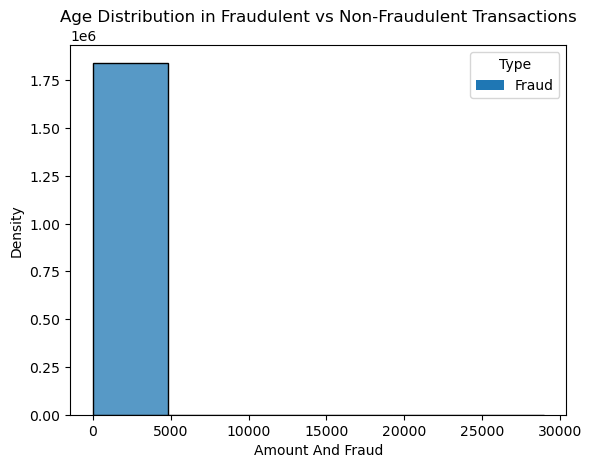

In [72]:
ax=sns.histplot(x='amt',data=data[data['is_fraud']==0],bins=6)
ax.set_xlabel('Amount And Fraud')
ax.set_ylabel('Density')

plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud'])

In [73]:
data[data['amt']>1000.0].amt.sort_values( ascending=False)

787549     28948.90
793677     27390.12
1234797    27119.77
606211     26544.12
352894     25086.94
             ...   
76595       1000.46
302154      1000.44
454268      1000.28
255303      1000.13
1282490     1000.03
Name: amt, Length: 5519, dtype: float64

In [74]:
data_backup=data   # data=data_backup

In [75]:
data

Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2019-01-01 00:00:18  2703186189652095   
1                1   2019-01-01 00:00:44      630423337322   
2                2   2019-01-01 00:00:51    38859492057661   
3                3   2019-01-01 00:01:16  3534093764340240   
4                4   2019-01-01 00:03:06   375534208663984   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt      first  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97   Jennifer   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23  Stephanie   
2                     fraud_Lind-Buckridge   entertainment  220.11     Edward   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00     Jeremy   
4                      fraud_Keeling-Crist        misc_pos   41.96      Tyler   
...                                    ...             ...     ...        ...   
555714               fraud_Reilly and Sons  health_fitness   43.77    Michael   
555715                fraud_Hoppe-Parisian       kids_pets  111.84       Jose   
555716                     fraud_Rau-Robel       kids_pets   86.88        Ann   
555717               fraud_Breitenberg LLC          travel    7.99       Eric   
555718                   fraud_Dare-Marvin   entertainment   38.13     Samuel   

           last gender                        street  ...  \
0         Banks      F                561 Perry Cove  ...   
1          Gill      F  43039 Riley Greens Suite 393  ...   
2       Sanchez      M      594 White Dale Suite 530  ...   
3         White      M   9443 Cynthia Court Apt. 038  ...   
4        Garcia      M              408 Bradley Rest  ...   
...         ...    ...                           ...  ...   
555714    Olson      M           558 Michael Estates  ...   
555715  Vasquez      M           572 Davis Mountains  ...   
555716   Lawson      F    144 Evans Islands Apt. 683  ...   
555717  Preston      M    7020 Doyle Stream Apt. 951  ...   
555718     Frey      M      830 Myers Plaza Apt. 384  ...   

                                      job         dob  \
0               Psychologist, counselling  1988-03-09   
1       Special educational needs teacher  1978-06-21   
2             Nature conservation officer  1962-01-19   
3                         Patent attorney  1967-01-12   
4          Dance movement psychotherapist  1986-03-28   
...                                   ...         ...   
555714                       Town planner  1966-02-13   
555715                     Futures trader  1999-12-27   
555716                           Musician  1981-11-29   
555717                       Cartographer  1965-12-15   
555718                        Media buyer  1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1       1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2       a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3       6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4       a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                  ...         ...        ...         ...   
555714  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
555715  2090647dac2c89a1d86c514c427f5b91  1388534349  29.661049  -96.186633   
555716  6c5b7c8add471975aa0fec023b2e8408  1388534355  46.658340 -119.715054   
555717  14392d723bb7737606b2700ac791b7aa  1388534364  44.470525 -117.080888   
555

In [76]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'notebook'

In [77]:
groups = ['is_fraud','job']
df_ = data.groupby(by=groups).agg({"amt":'mean',"trans_num":"count"}).fillna(0).reset_index()

# Top 10 jobs had most fraud transactions.
df_ = df_[df_.is_fraud==1].sort_values(by='trans_num',
                                       ascending=False).drop_duplicates('job', keep='first').iloc[:10, :]
df_

is_fraud                                    job         amt  trans_num
856         1                      Quantity surveyor  611.805652         69
782         1                        Naval architect  650.121970         66
760         1                     Materials engineer  561.092097         62
517         1                 Audiological scientist  662.505172         58
894         1  Senior tax professional/tax inspector  570.492456         57
952         1              Trading standards officer  478.137143         56
819         1                             Podiatrist  477.762593         54
667         1                      Film/video editor  528.820577         52
661         1                    Exhibition designer  524.067255         51
567         1                    Colour technologist  440.824706         51

In [78]:
fig = px.bar(df_,
             y='job', x='trans_num',
             color='amt',
             color_continuous_scale=px.colors.sequential.Magma,
             labels={'job':'Job title', 
                     'trans_num': 'Number of fraud transactions'},
             category_orders = {"job": df_.job.values},
             width=960,
             height=600)

fig.update_layout(
    title=dict(
        text='Amount(usd) among top 10 jobs with the most fraud transactions'
    ),
    plot_bgcolor='#fafafa'
)

fig.update_coloraxes(
    colorbar=dict(
        title='Amount(usd) of transactions',
        orientation='h',
        x=1
    ),
    reversescale=True
)

fig.show()

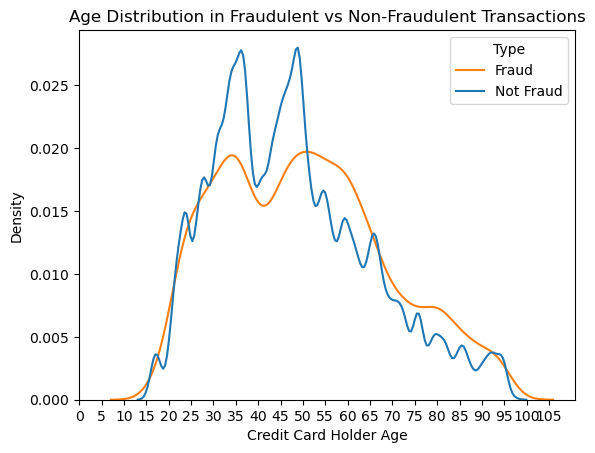

In [79]:
ax=sns.kdeplot(x='age',data=data, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [80]:
data

Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2019-01-01 00:00:18  2703186189652095   
1                1   2019-01-01 00:00:44      630423337322   
2                2   2019-01-01 00:00:51    38859492057661   
3                3   2019-01-01 00:01:16  3534093764340240   
4                4   2019-01-01 00:03:06   375534208663984   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt      first  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97   Jennifer   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23  Stephanie   
2                     fraud_Lind-Buckridge   entertainment  220.11     Edward   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00     Jeremy   
4                      fraud_Keeling-Crist        misc_pos   41.96      Tyler   
...                                    ...             ...     ...        ...   
555714               fraud_Reilly and Sons  health_fitness   43.77    Michael   
555715                fraud_Hoppe-Parisian       kids_pets  111.84       Jose   
555716                     fraud_Rau-Robel       kids_pets   86.88        Ann   
555717               fraud_Breitenberg LLC          travel    7.99       Eric   
555718                   fraud_Dare-Marvin   entertainment   38.13     Samuel   

           last gender                        street  ...  \
0         Banks      F                561 Perry Cove  ...   
1          Gill      F  43039 Riley Greens Suite 393  ...   
2       Sanchez      M      594 White Dale Suite 530  ...   
3         White      M   9443 Cynthia Court Apt. 038  ...   
4        Garcia      M              408 Bradley Rest  ...   
...         ...    ...                           ...  ...   
555714    Olson      M           558 Michael Estates  ...   
555715  Vasquez      M           572 Davis Mountains  ...   
555716   Lawson      F    144 Evans Islands Apt. 683  ...   
555717  Preston      M    7020 Doyle Stream Apt. 951  ...   
555718     Frey      M      830 Myers Plaza Apt. 384  ...   

                                      job         dob  \
0               Psychologist, counselling  1988-03-09   
1       Special educational needs teacher  1978-06-21   
2             Nature conservation officer  1962-01-19   
3                         Patent attorney  1967-01-12   
4          Dance movement psychotherapist  1986-03-28   
...                                   ...         ...   
555714                       Town planner  1966-02-13   
555715                     Futures trader  1999-12-27   
555716                           Musician  1981-11-29   
555717                       Cartographer  1965-12-15   
555718                        Media buyer  1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1       1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2       a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3       6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4       a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                  ...         ...        ...         ...   
555714  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
555715  2090647dac2c89a1d86c514c427f5b91  1388534349  29.661049  -96.186633   
555716  6c5b7c8add471975aa0fec023b2e8408  1388534355  46.658340 -119.715054   
555717  14392d723bb7737606b2700ac791b7aa  1388534364  44.470525 -117.080888   
555

In [81]:
data['city_pop'].nunique()

891

In [82]:
gender_map={'M':0, 'F':1}

In [83]:
data['gender']=data['gender'].map(gender_map)

In [84]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'age', 'trans_time_sec',
       'trans_time_hour'],
      dtype='object')

In [85]:
drop_columns=['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 
        'first', 'last', 'street', 'city', 'state', 'zip',
        'city_pop', 'job','dob' , 'trans_num', 'unix_time','trans_time_sec']

In [86]:
data.drop(columns=drop_columns, inplace=True)

In [87]:
data

category     amt  gender      lat      long  merch_lat  \
0             misc_net    4.97       1  36.0788  -81.1781  36.011293   
1          grocery_pos  107.23       1  48.8878 -118.2105  49.159047   
2        entertainment  220.11       0  42.1808 -112.2620  43.150704   
3        gas_transport   45.00       0  46.2306 -112.1138  47.034331   
4             misc_pos   41.96       0  38.4207  -79.4629  38.674999   
...                ...     ...     ...      ...       ...        ...   
555714  health_fitness   43.77       0  40.4931  -91.8912  39.946837   
555715       kids_pets  111.84       0  29.0393  -95.4401  29.661049   
555716       kids_pets   86.88       1  46.1966 -118.9017  46.658340   
555717          travel    7.99       0  44.6255 -116.4493  44.470525   
555718   entertainment   38.13       0  35.6665  -97.4798  36.210097   

        merch_long  is_fraud  age  trans_time_hour  
0       -82.048315         0   33                0  
1      -118.186462         0   43                0  
2      -112.154481         0   59                0  
3      -112.561071         0   54                0  
4       -78.632459         0   35                0  
...            ...       ...  ...              ...  
555714  -91.333331         0   55               23  
555715  -96.186633         0   22               23  
555716 -119.715054         0   40               23  
555717 -117.080888         0   56               23  
555718  -97.036372         0   28               23  

[1852394 rows x 10 columns]

In [88]:
y=data['is_fraud']
data.drop(columns=['is_fraud'], inplace=True)
X=data

In [89]:
X_bckp, y_bckp= X,y

In [90]:
X, y = X_bckp, y_bckp

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

In [92]:
from sklearn.preprocessing import OneHotEncoder

enc=OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohenc=enc.fit_transform(X_train.loc[:,'category'].values.reshape(-1,1))


In [93]:
enc.categories_

[array(['entertainment', 'food_dining', 'gas_transport', 'grocery_net',
        'grocery_pos', 'health_fitness', 'home', 'kids_pets', 'misc_net',
        'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos',
        'travel'], dtype=object)]

In [94]:
X_train[enc.categories_[0]]=ohenc

In [95]:
X_train.drop(columns=['category'], inplace=True)

In [96]:
X_train

amt  gender      lat      long  merch_lat  merch_long  age  \
45035    25.69       1  43.8065  -73.0882  43.767258  -73.422465   46   
532137   93.85       1  39.4125  -80.6352  39.347762  -80.278354   50   
828776    8.21       1  26.6939  -81.9452  26.764882  -81.143742   53   
324166   66.95       0  33.9143 -118.3493  33.717995 -118.607421   26   
526588    2.60       1  42.1001  -73.3611  42.913387  -72.474036   48   
...        ...     ...      ...       ...        ...         ...  ...   
259178    2.33       1  41.4682  -72.5751  40.711495  -71.670634   57   
117739    9.12       1  33.5567  -90.5451  33.741894  -89.875290   35   
131932  118.27       1  35.0203 -106.5503  34.849069 -106.219762   43   
671155    5.60       0  48.6669  -96.5969  47.807830  -97.498754   79   
121958  140.73       1  34.9572  -81.9916  34.989024  -82.842443   32   

        trans_time_hour  entertainment  food_dining  ...  grocery_pos  \
45035                18            0.0          0.0  ...          0.0   
532137                9            0.0          0.0  ...          0.0   
828776                9            0.0          0.0  ...          0.0   
324166                5            0.0          0.0  ...          1.0   
526588                1            0.0          0.0  ...          0.0   
...                 ...            ...          ...  ...          ...   
259178                6            0.0          0.0  ...          0.0   
117739               20            0.0          0.0  ...          0.0   
131932               21            0.0          0.0  ...          0.0   
671155                9            0.0          0.0  ...          0.0   
121958               18            0.0          0.0  ...          0.0   

        health_fitness  home  kids_pets  misc_net  misc_pos  personal_care  \
45035              0.0   1.0        0.0       0.0       0.0            0.0   
532137             0.0   0.0        0.0       0.0       0.0            0.0   
828776             0.0   0.0        0.0       1.0       0.0            0.0   
324166             0.0   0.0        0.0       0.0       0.0            0.0   
526588             0.0   0.0        0.0       1.0       0.0            0.0   
...                ...   ...        ...       ...       ...            ...   
259178             0.0   0.0        0.0       0.0       1.0            0.0   
117739             0.0   0.0        0.0       0.0       0.0            0.0   
131932             0.0   1.0        0.0       0.0       0.0            0.0   
671155             0.0   0.0        0.0       0.0       0.0            0.0   
121958             0.0   0.0        0.0       0.0       0.0            1.0   

        shopping_net  shopping_pos  travel  
45035            0.0           0.0     0.0  
532137           0.0           0.0     0.0  
828776           0.0           0.0     0.0  
324166           0.0           0.0     0.0  
526588           0.0           0.0     0.0  
...              ...           ...     ...  
259178           0.0           0.0     0.0  
117739           0.0           0.0     1.0  
131932           0.0           0.0     0.0  
671155           0.0           1.0     0.0  
121958           0.0           0.0     0.0  

[1296675 rows x 22 columns]

In [97]:
ohenc_test=enc.transform(X_test.loc[:,'category'].values.reshape(-1,1))

In [98]:
X_test[enc.categories_[0]]=ohenc_test
X_test.drop(columns=['category'], inplace=True)

In [99]:
X_test

amt  gender      lat      long  merch_lat  merch_long  age  \
244469  59.91       0  45.7801 -111.1439  45.274075 -111.649432   46   
434906   3.96       0  42.6911  -71.1605  43.356278  -71.008959   36   
354659  51.17       1  42.5978  -82.8823  42.372483  -83.508020   94   
197113   2.06       1  34.2853  -91.3336  33.833389  -91.158293   28   
468148   6.58       0  32.7699  -96.7430  32.458643  -96.577001   79   
...       ...     ...      ...       ...        ...         ...  ...   
147437   9.63       0  40.9207  -96.1680  41.233033  -96.985836   54   
374075  85.32       0  40.8027  -81.3739  39.935932  -80.801827   58   
153028  44.42       1  33.4130  -81.6900  32.667120  -81.268835   35   
121903  70.30       0  39.8839  -75.4669  38.924503  -75.430423   76   
204408  47.16       1  33.1194  -83.8235  33.730013  -84.615158   31   

        trans_time_hour  entertainment  food_dining  ...  grocery_pos  \
244469                7            0.0          0.0  ...          0.0   
434906               17            0.0          0.0  ...          0.0   
354659               11            0.0          0.0  ...          0.0   
197113               22            0.0          0.0  ...          0.0   
468148               15            0.0          0.0  ...          0.0   
...                 ...            ...          ...  ...          ...   
147437               13            0.0          0.0  ...          0.0   
374075                5            0.0          1.0  ...          0.0   
153028               14            0.0          0.0  ...          0.0   
121903               17            0.0          0.0  ...          0.0   
204408               20            0.0          0.0  ...          0.0   

        health_fitness  home  kids_pets  misc_net  misc_pos  personal_care  \
244469             0.0   0.0        0.0       0.0       0.0            0.0   
434906             0.0   0.0        0.0       0.0       0.0            0.0   
354659             0.0   0.0        0.0       0.0       0.0            0.0   
197113             0.0   0.0        0.0       0.0       0.0            0.0   
468148             0.0   0.0        0.0       0.0       0.0            0.0   
...                ...   ...        ...       ...       ...            ...   
147437             0.0   0.0        0.0       0.0       0.0            1.0   
374075             0.0   0.0        0.0       0.0       0.0            0.0   
153028             1.0   0.0        0.0       0.0       0.0            0.0   
121903             0.0   0.0        1.0       0.0       0.0            0.0   
204408             0.0   1.0        0.0       0.0       0.0            0.0   

        shopping_net  shopping_pos  travel  
244469           0.0           0.0     0.0  
434906           0.0           1.0     0.0  
354659           0.0           0.0     0.0  
197113           0.0           1.0     0.0  
468148           0.0           0.0     1.0  
...              ...           ...     ...  
147437           0.0           0.0     0.0  
374075           0.0           0.0     0.0  
153028           0.0           0.0     0.0  
121903           0.0           0.0     0.0  
204408           0.0           0.0     0.0  

[555719 rows x 22 columns]

In [100]:
X_train

amt  gender      lat      long  merch_lat  merch_long  age  \
45035    25.69       1  43.8065  -73.0882  43.767258  -73.422465   46   
532137   93.85       1  39.4125  -80.6352  39.347762  -80.278354   50   
828776    8.21       1  26.6939  -81.9452  26.764882  -81.143742   53   
324166   66.95       0  33.9143 -118.3493  33.717995 -118.607421   26   
526588    2.60       1  42.1001  -73.3611  42.913387  -72.474036   48   
...        ...     ...      ...       ...        ...         ...  ...   
259178    2.33       1  41.4682  -72.5751  40.711495  -71.670634   57   
117739    9.12       1  33.5567  -90.5451  33.741894  -89.875290   35   
131932  118.27       1  35.0203 -106.5503  34.849069 -106.219762   43   
671155    5.60       0  48.6669  -96.5969  47.807830  -97.498754   79   
121958  140.73       1  34.9572  -81.9916  34.989024  -82.842443   32   

        trans_time_hour  entertainment  food_dining  ...  grocery_pos  \
45035                18            0.0          0.0  ...          0.0   
532137                9            0.0          0.0  ...          0.0   
828776                9            0.0          0.0  ...          0.0   
324166                5            0.0          0.0  ...          1.0   
526588                1            0.0          0.0  ...          0.0   
...                 ...            ...          ...  ...          ...   
259178                6            0.0          0.0  ...          0.0   
117739               20            0.0          0.0  ...          0.0   
131932               21            0.0          0.0  ...          0.0   
671155                9            0.0          0.0  ...          0.0   
121958               18            0.0          0.0  ...          0.0   

        health_fitness  home  kids_pets  misc_net  misc_pos  personal_care  \
45035              0.0   1.0        0.0       0.0       0.0            0.0   
532137             0.0   0.0        0.0       0.0       0.0            0.0   
828776             0.0   0.0        0.0       1.0       0.0            0.0   
324166             0.0   0.0        0.0       0.0       0.0            0.0   
526588             0.0   0.0        0.0       1.0       0.0            0.0   
...                ...   ...        ...       ...       ...            ...   
259178             0.0   0.0        0.0       0.0       1.0            0.0   
117739             0.0   0.0        0.0       0.0       0.0            0.0   
131932             0.0   1.0        0.0       0.0       0.0            0.0   
671155             0.0   0.0        0.0       0.0       0.0            0.0   
121958             0.0   0.0        0.0       0.0       0.0            1.0   

        shopping_net  shopping_pos  travel  
45035            0.0           0.0     0.0  
532137           0.0           0.0     0.0  
828776           0.0           0.0     0.0  
324166           0.0           0.0     0.0  
526588           0.0           0.0     0.0  
...              ...           ...     ...  
259178           0.0           0.0     0.0  
117739           0.0           0.0     1.0  
131932           0.0           0.0     0.0  
671155           0.0           1.0     0.0  
121958           0.0           0.0     0.0  

[1296675 rows x 22 columns]

In [101]:
X_train.columns

Index(['amt', 'gender', 'lat', 'long', 'merch_lat', 'merch_long', 'age',
       'trans_time_hour', 'entertainment', 'food_dining', 'gas_transport',
       'grocery_net', 'grocery_pos', 'health_fitness', 'home', 'kids_pets',
       'misc_net', 'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos',
       'travel'],
      dtype='object')

In [102]:

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train[['amt', 'lat', 'long', 'merch_lat', 'merch_long', 'age','trans_time_hour' ]])
X_train[['amt', 'lat', 'long', 'merch_lat', 'merch_long', 'age','trans_time_hour']] = scaler.transform(X_train[['amt', 'lat', 'long', 'merch_lat', 'merch_long', 'age','trans_time_hour' ]])


In [103]:

from sklearn.preprocessing import StandardScaler
X_test[['amt', 'lat', 'long', 'merch_lat', 'merch_long', 'age','trans_time_hour']] = scaler.transform(X_test[['amt', 'lat', 'long', 'merch_lat', 'merch_long', 'age','trans_time_hour' ]])


In [104]:
X_train   # After Standard scaler 

amt  gender       lat      long  merch_lat  merch_long       age  \
45035  -0.279083       1  1.039433  1.247156   1.024828    1.221753 -0.098468   
532137  0.148878       1  0.172173  0.697850   0.158372    0.723185  0.131556   
828776 -0.388836       1 -2.338141  0.602502  -2.308543    0.660253  0.304074   
324166 -0.020021       0 -0.913026 -2.047161  -0.945363   -2.064147 -1.248587   
526588 -0.424060       1  0.702635  1.227293   0.857424    1.290724  0.016544   
...          ...     ...       ...       ...        ...         ...       ...   
259178 -0.425755       1  0.577914  1.284502   0.425736    1.349148  0.534098   
117739 -0.383123       1 -0.983606 -0.023440  -0.940677    0.025285 -0.731033   
131932  0.302205       1 -0.694730 -1.188374  -0.723612   -1.163302 -0.270985   
671155 -0.405224       0  1.998747 -0.463918   1.816996   -0.529101  1.799229   
121958  0.443227       1 -0.707185  0.599125  -0.696173    0.536722 -0.903551   

        trans_time_hour  entertainment  food_dining  ...  grocery_pos  \
45035          0.762202            0.0          0.0  ...          0.0   
532137        -0.558875            0.0          0.0  ...          0.0   
828776        -0.558875            0.0          0.0  ...          0.0   
324166        -1.146021            0.0          0.0  ...          1.0   
526588        -1.733166            0.0          0.0  ...          0.0   
...                 ...            ...          ...  ...          ...   
259178        -0.999234            0.0          0.0  ...          0.0   
117739         1.055775            0.0          0.0  ...          0.0   
131932         1.202561            0.0          0.0  ...          0.0   
671155        -0.558875            0.0          0.0  ...          0.0   
121958         0.762202            0.0          0.0  ...          0.0   

        health_fitness  home  kids_pets  misc_net  misc_pos  personal_care  \
45035              0.0   1.0        0.0       0.0       0.0            0.0   
532137             0.0   0.0        0.0       0.0       0.0            0.0   
828776             0.0   0.0        0.0       1.0       0.0            0.0   
324166             0.0   0.0        0.0       0.0       0.0            0.0   
526588             0.0   0.0        0.0       1.0       0.0            0.0   
...                ...   ...        ...       ...       ...            ...   
259178             0.0   0.0        0.0       0.0       1.0            0.0   
117739             0.0   0.0        0.0       0.0       0.0            0.0   
131932             0.0   1.0        0.0       0.0       0.0            0.0   
671155             0.0   0.0        0.0       0.0       0.0            0.0   
121958             0.0   0.0        0.0       0.0       0.0            1.0   

        shopping_net  shopping_pos  travel  
45035            0.0           0.0     0.0  
532137           0.0           0.0     0.0  
828776           0.0           0.0     0.0  
324166           0.0           0.0     0.0  
526588           0.0           0.0     0.0  
...              ...           ...     ...  
259178           0.0           0.0     0.0  
117739           0.0           0.0     1.0  
131932           0.0           0.0     0.0  
671155           0.0           1.0     0.0  
121958           0.0           0.0     0.0  

[1296675 rows x 22 columns]

In [105]:
X_test # After Standard scaler 

amt  gender       lat      long  merch_lat  merch_long       age  \
244469 -0.064224       0  1.428969 -1.522718   1.320245   -1.558154 -0.098468   
434906 -0.415521       0  0.819282  1.387463   0.944254    1.397266 -0.673527   
354659 -0.119100       1  0.800867  0.534295   0.751378    0.488320  2.661819   
197113 -0.427451       1 -0.839800 -0.080830  -0.922739   -0.068016 -1.133575   
468148 -0.399071       0 -1.138900 -0.474552  -1.192263   -0.462070  1.799229   
...          ...     ...       ...       ...        ...         ...       ...   
147437 -0.379920       0  0.469852 -0.432701   0.527985   -0.491801  0.361580   
374075  0.095320       0  0.446562  0.644084   0.273684    0.685117  0.591604   
153028 -0.161482       1 -1.011969  0.621076  -1.151390    0.651156 -0.731033   
121903  0.001013       0  0.265215  1.074023   0.075390    1.075732  1.626711   
204408 -0.144278       1 -1.069918  0.465790  -0.943006    0.407808 -0.961057   

        trans_time_hour  entertainment  food_dining  ...  grocery_pos  \
244469        -0.852448            0.0          0.0  ...          0.0   
434906         0.615416            0.0          0.0  ...          0.0   
354659        -0.265302            0.0          0.0  ...          0.0   
197113         1.349348            0.0          0.0  ...          0.0   
468148         0.321843            0.0          0.0  ...          0.0   
...                 ...            ...          ...  ...          ...   
147437         0.028270            0.0          0.0  ...          0.0   
374075        -1.146021            0.0          1.0  ...          0.0   
153028         0.175057            0.0          0.0  ...          0.0   
121903         0.615416            0.0          0.0  ...          0.0   
204408         1.055775            0.0          0.0  ...          0.0   

        health_fitness  home  kids_pets  misc_net  misc_pos  personal_care  \
244469             0.0   0.0        0.0       0.0       0.0            0.0   
434906             0.0   0.0        0.0       0.0       0.0            0.0   
354659             0.0   0.0        0.0       0.0       0.0            0.0   
197113             0.0   0.0        0.0       0.0       0.0            0.0   
468148             0.0   0.0        0.0       0.0       0.0            0.0   
...                ...   ...        ...       ...       ...            ...   
147437             0.0   0.0        0.0       0.0       0.0            1.0   
374075             0.0   0.0        0.0       0.0       0.0            0.0   
153028             1.0   0.0        0.0       0.0       0.0            0.0   
121903             0.0   0.0        1.0       0.0       0.0            0.0   
204408             0.0   1.0        0.0       0.0       0.0            0.0   

        shopping_net  shopping_pos  travel  
244469           0.0           0.0     0.0  
434906           0.0           1.0     0.0  
354659           0.0           0.0     0.0  
197113           0.0           1.0     0.0  
468148           0.0           0.0     1.0  
...              ...           ...     ...  
147437           0.0           0.0     0.0  
374075           0.0           0.0     0.0  
153028           0.0           0.0     0.0  
121903           0.0           0.0     0.0  
204408           0.0           0.0     0.0  

[555719 rows x 22 columns]

In this case, other alternative evaluation metrics can be applied such as:  

Precision/Specificity: how many selected instances are relevant.  
Recall/Sensitivity: how many relevant instances are selected.  
F1 score: harmonic mean of precision and recall.  
MCC: correlation coefficient between the observed and predicted binary classifications.  
AUC: relation between true-positive rate and false positive rate.  




In [106]:
# Upsampling

In [107]:
X_y_train = pd.concat([X_train, y_train], axis=1)

In [108]:
X_y_train_bckp=X_y_train

In [109]:
# class count
class_count_0, class_count_1 = X_y_train['is_fraud'].value_counts()

# Separate class
class_0 = X_y_train[X_y_train['is_fraud'] == 0]
class_1 = X_y_train[X_y_train['is_fraud'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)


class 0: (1289962, 23)
class 1: (6713, 23)


total class of 1 and 0: 1    1289962
0    1289962
Name: is_fraud, dtype: int64


<Axes: title={'center': 'count (target)'}>

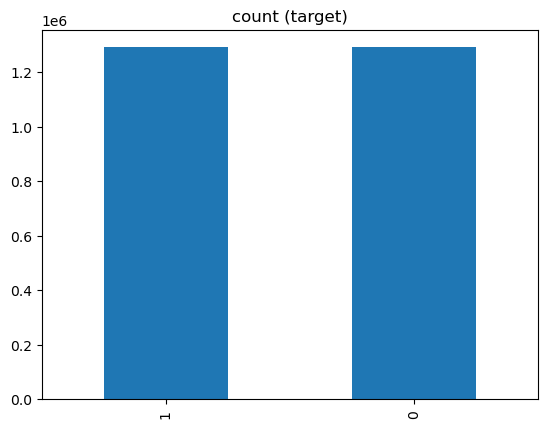

In [110]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_over['is_fraud'].value_counts())# plot the count after under-sampeling
test_over['is_fraud'].value_counts().plot(kind='bar', title='count (target)')

In [111]:
X_y_train_balanced=test_over 

In [112]:
y_train_os_bal=X_y_train_balanced['is_fraud']

In [113]:
X_train_os_balanced=X_y_train_balanced.drop(columns=['is_fraud'])

In [114]:
#X_train_os_balanced, y_train_os_bal

In [115]:
# Using Imblearn Library
import imblearn

In [116]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=42)# fit predictor and target variable
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_train_ros))

original dataset shape: Counter({0: 1289962, 1: 6713})
Resample dataset shape Counter({0: 1289962, 1: 1289962})


In [117]:
y_train_ros.value_counts()

0    1289962
1    1289962
Name: is_fraud, dtype: int64

In [118]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_train_smote))

Original dataset shape Counter({0: 1289962, 1: 6713})
Resample dataset shape Counter({0: 1289962, 1: 1289962})


In [119]:
y_train_smote.value_counts()

0    1289962
1    1289962
Name: is_fraud, dtype: int64

In [120]:
X_train_smote.shape, y_train_smote.shape

((2579924, 22), (2579924,))

In [121]:
# X_train_smote, y_train_smote   Train Data from Smote

# X_train_ros, y_train_ros        Train Data from Random Over Sampler

# X_train_os_balanced, y_train_os_balanced  Train Data from Upsampling 

In [122]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4, random_state=42)
clf.fit(X_train_ros, y_train_ros)

RandomForestClassifier(max_depth=4, random_state=42)

In [123]:
data=((X_train_smote, y_train_smote ), (X_train_ros, y_train_ros ), (X_train_os_balanced, y_train_os_bal) )

In [ ]:
y_train_os_bal.shape

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
clf = RandomForestClassifier(max_depth=5, random_state=42)

train_confusion_matrix=[]
f1_score_list=[]
average_precision_score_list=[]


for x_train,y_train in (data):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_train)
    
    
    train_confusion_matrix.append(confusion_matrix(y_train, y_pred))
    f1_score_list.append(f1_score(y_train, y_pred))
    average_precision_score_list.append(average_precision_score(y_train, y_pred))
    
    
    
    

    

In [ ]:
train_confusion_matrix

In [ ]:
f1_score_list

In [ ]:
average_precision_score_list

In [ ]:


clf_log = LogisticRegression(random_state=0).fit(X, y)
clf_log.predict()
clf.predict_proba(X[:2, :])
clf.score(X, y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
clf_log = LogisticRegression(random_state=0)

log_train_confusion_matrix=[]
log_f1_score_list=[]
log_average_precision_score_list=[]


for x_train,y_train in (data):
    clf_log.fit(x_train, y_train)
    y_pred = clf_log.predict(x_train)
    
    
    log_train_confusion_matrix.append(confusion_matrix(y_train, y_pred))
    log_f1_score_list.append(f1_score(y_train, y_pred))
    log_average_precision_score_list.append(average_precision_score(y_train, y_pred))
    
    
    
    

    

In [ ]:
log_train_confusion_matrix

In [ ]:
log_f1_score_list

In [ ]:
log_average_precision_score_list

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)

# Create a parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees in the forest
    'max_depth': [3, 5, 7],      # Maximum depth of each tree
    'min_samples_split': [2, 5, 8],      # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],        # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],     # Number of features to consider for the best split
}


grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='f1')


# Fit the GridSearchCV object to your data
grid_search.fit(X_train, y_train)  # Replace X_train and y_train with your training data

# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

In [ ]:
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)  # Replace X_test with your test data

# Compute the F1 score
f1 = f1_score(y_test, y_pred)  # Replace y_test with your actual test labels
print("F1 Score:", f1)

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50],        # Number of trees in the forest
    'max_depth': [3],      # Maximum depth of each tree
    'min_samples_split': [2],      # Minimum samples required to split an internal node
    'min_samples_leaf': [1],        # Minimum samples required to be at a leaf node
}

rfc_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rfc_clf, param_grid=param_grid, cv=5, scoring='f1')

train_confusion_matrix=[]
f1_score_list=[]
average_precision_score_list=[]


for x_train,y_train in (data):
    grid_search.fit(x_train, y_train)
    best_rf_clf = grid_search.best_estimator_
    print("Best Param For Iteration:",grid_search.best_params_)
    y_pred = best_rf_clf.predict(x_train)
    
    
    train_confusion_matrix.append(confusion_matrix(y_train, y_pred))
    f1_score_list.append(f1_score(y_train, y_pred))
    average_precision_score_list.append(average_precision_score(y_train, y_pred))

Best Param For Iteration: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Param For Iteration: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Param For Iteration: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
